### The supervised model will predict the frequency of outflow of CitiBikes bikes at a particular station at any point in the day

In [1]:
# Importing the libraries for Google Drive
!pip install -U -q PyDrive
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [2]:
# Getting authentication from the google drive 
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [3]:
# Importing all the necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import sys, math, os
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score    
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import svm
sys.path.append("..")
from sklearn.svm import SVC
from sklearn import metrics
import datetime as dt
%matplotlib inline
sns.set(style='ticks', palette='Set2')
from datetime import date 
import holidays 

# Merge the dataframe

In [51]:
# Filtering the data of 'Pershing Square North' Station from all CSV files and merging the data 

links = ['https://drive.google.com/open?id=1xbrdf8HSpRxwMxer7E3KrVZLAiBd0iFX','https://drive.google.com/open?id=1SQKc-Rmnhy9Fjl7TJQfRfvhXeR_S7Dgz','https://drive.google.com/open?id=1Vn_ClTK-a_qI8TcL_I_S0Q8ActIVY9p_','https://drive.google.com/open?id=12j1vGHmwAv_JmVjKjhVNfbk3teVqpkFy','https://drive.google.com/open?id=1RUqLFcvUYqqNWhRDdExmn-2mRy9DUX0u','https://drive.google.com/open?id=101pMEtzouYBOq6k80527JNM2A9dhlXQu','https://drive.google.com/open?id=1Asl-xwqIX7e5ARWCnQeI4fMDGHgpI7g1','https://drive.google.com/open?id=106ag3ruckNmPMVJO2eYva6Qar2T7E2Ve','https://drive.google.com/open?id=126nWddO6Hr3O2yF1WgEPz3KO4L8A0wJi','https://drive.google.com/open?id=1UqWnyZtBHgu7Hmo6rP1HjK0x0aY96vLo','https://drive.google.com/open?id=1ogu2Hb8ErOY5_SFwEkWOD8pvMymCgv7Q','https://drive.google.com/open?id=1z0OJIDkzwuZZpeHiPD4qLnkN7Y-BmCea']
df = None
station_name = 'Pershing Square North'.lower()
for i in links:
  fluff, id = i.split('=')
  downloaded = drive.CreateFile({'id': id})
  downloaded.GetContentFile('citi_bike_data.csv')
  if df is None:
    df = pd.read_csv('citi_bike_data.csv')
    df = df[ (df['start station name'].str.lower() == station_name)] 
    print(i, "-", df.shape)
  else:
    new = pd.read_csv('citi_bike_data.csv')
    new = new[ (new['start station name'].str.lower() == station_name)] 
    df = pd.concat([df, new])
    print(i, "-", new.shape, df.shape)
print(df.shape)

https://drive.google.com/open?id=1xbrdf8HSpRxwMxer7E3KrVZLAiBd0iFX - (8874, 15)
https://drive.google.com/open?id=1SQKc-Rmnhy9Fjl7TJQfRfvhXeR_S7Dgz - (8084, 15) (16958, 15)
https://drive.google.com/open?id=1Vn_ClTK-a_qI8TcL_I_S0Q8ActIVY9p_ - (10889, 15) (27847, 15)
https://drive.google.com/open?id=12j1vGHmwAv_JmVjKjhVNfbk3teVqpkFy - (13625, 15) (41472, 15)
https://drive.google.com/open?id=1RUqLFcvUYqqNWhRDdExmn-2mRy9DUX0u - (14720, 15) (56192, 15)
https://drive.google.com/open?id=101pMEtzouYBOq6k80527JNM2A9dhlXQu - (14778, 15) (70970, 15)
https://drive.google.com/open?id=1Asl-xwqIX7e5ARWCnQeI4fMDGHgpI7g1 - (16348, 15) (87318, 15)
https://drive.google.com/open?id=106ag3ruckNmPMVJO2eYva6Qar2T7E2Ve - (16564, 15) (103882, 15)
https://drive.google.com/open?id=126nWddO6Hr3O2yF1WgEPz3KO4L8A0wJi - (16969, 15) (120851, 15)
https://drive.google.com/open?id=1UqWnyZtBHgu7Hmo6rP1HjK0x0aY96vLo - (16426, 15) (137277, 15)
https://drive.google.com/open?id=1ogu2Hb8ErOY5_SFwEkWOD8pvMymCgv7Q - (11736, 15) 

In [52]:
print(df.shape)

(156575, 15)


In [53]:
df.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender
count,1.565750e+05,156575.0,1.565750e+05,156575.000000,156575.000000,156575.000000,156575.000000,156575.000000,156575.000000,156575.000000
mean,8.440750e+02,519.0,4.075187e+01,-73.977706,1151.826920,40.745663,-73.986236,29790.281469,1977.801916,1.080849
std,8.015902e+03,0.0,3.209538e-07,0.000002,1272.842606,0.016207,0.012415,7375.399792,11.979797,0.412326
min,6.100000e+01,519.0,4.075187e+01,-73.977706,72.000000,40.661063,-74.017134,14529.000000,1886.000000,0.000000
25%,4.300000e+02,519.0,4.075187e+01,-73.977706,442.000000,40.738274,-73.993012,25688.000000,1969.000000,1.000000
50%,6.180000e+02,519.0,4.075187e+01,-73.977706,492.000000,40.745712,-73.987654,30936.000000,1979.000000,1.000000
75%,9.780000e+02,519.0,4.075187e+01,-73.977706,546.000000,40.754666,-73.979922,34988.000000,1988.000000,1.000000
max,2.946638e+06,519.0,4.075200e+01,-73.977000,3908.000000,40.818299,-73.907744,42046.000000,2003.000000,2.000000


# Cleaning the dataframe

In [54]:
# Sorting the dataframe
df.sort_values("tripduration", axis = 0, ascending = True, inplace = True, na_position ='last')

# Number of trips under 90 seconds
trip = df.apply(lambda x: True if x['tripduration'] < 91 else False , axis=1)
numOfRows = len(trip[trip == True].index)
percent_del = numOfRows / len(df)
print('Number of Rows in dataframe less than 90 seconds : ', numOfRows)
print('Percentage of rows that will be deleted: ', percent_del)

Number of Rows in dataframe less than 90 seconds :  283
Percentage of rows that will be deleted:  0.0018074405237106818


In [55]:
# Drop trips that are less than 90 seconds and where start and end stations are the same
df_clean = df.drop(df[(df['tripduration'] < 91)].index)

In [56]:
# Number of trips where start and end station are the same
df_dup = df_clean[df_clean['start station id'] == df_clean['end station id']]
print (len(df_dup)/404947) 

# Look at it against the number of minutes
df_clean = df.drop(df_clean[(df_clean['start station id'] == df_clean['end station id'])].index)
df_clean.info()

0.002145959841658291
<class 'pandas.core.frame.DataFrame'>
Int64Index: 155657 entries, 1644578 to 42479
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   tripduration             155657 non-null  int64  
 1   starttime                155657 non-null  object 
 2   stoptime                 155657 non-null  object 
 3   start station id         155657 non-null  float64
 4   start station name       155657 non-null  object 
 5   start station latitude   155657 non-null  float64
 6   start station longitude  155657 non-null  float64
 7   end station id           155657 non-null  float64
 8   end station name         155657 non-null  object 
 9   end station latitude     155657 non-null  float64
 10  end station longitude    155657 non-null  float64
 11  bikeid                   155657 non-null  int64  
 12  usertype                 155657 non-null  object 
 13  birth year               155657 n

In [57]:
# Printing the dataframe
df = df_clean
df

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
1644578,61,2019-10-24 17:55:46.4800,2019-10-24 17:56:47.6660,519.0,Pershing Square North,40.751873,-73.977706,3235.0,E 41 St & Madison Ave,40.752165,-73.979922,21565,Subscriber,1984,1
622844,61,2019-06-08 22:13:59.7940,2019-06-08 22:15:01.7720,519.0,Pershing Square North,40.751873,-73.977706,519.0,Pershing Square North,40.751873,-73.977706,30664,Customer,1996,2
2311943,61,2019-09-29 11:59:30.1640,2019-09-29 12:00:31.7750,519.0,Pershing Square North,40.751873,-73.977706,519.0,Pershing Square North,40.751873,-73.977706,17025,Subscriber,1991,2
851951,61,2019-03-22 18:50:56.9440,2019-03-22 18:51:58.2660,519.0,Pershing Square North,40.751873,-73.977706,519.0,Pershing Square North,40.751873,-73.977706,34194,Subscriber,1983,1
1726483,61,2019-07-25 21:18:26.4470,2019-07-25 21:19:27.6210,519.0,Pershing Square North,40.751873,-73.977706,519.0,Pershing Square North,40.751873,-73.977706,28388,Customer,1969,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735450,136627,2019-01-23 19:29:11.6170,2019-01-25 09:26:19.4510,519.0,Pershing Square North,40.751873,-73.977706,3424.0,E 106 St & Lexington Ave,40.791976,-73.945993,17519,Customer,1989,1
272661,142449,2019-07-04 19:52:54.4030,2019-07-06 11:27:03.4440,519.0,Pershing Square North,40.751873,-73.977706,3583.0,Eastern Pkwy & Washington Ave,40.671649,-73.963115,26988,Customer,1986,2
925875,584342,2019-06-13 17:04:30.8340,2019-06-20 11:23:33.3080,519.0,Pershing Square North,40.751873,-73.977706,3596.0,Sullivan Pl & Bedford Ave,40.664241,-73.957469,19586,Customer,1969,0
42524,909120,2019-10-01 15:22:42.0370,2019-10-12 03:54:42.8370,519.0,Pershing Square North,40.751873,-73.977706,427.0,Bus Slip & State St,40.701907,-74.013942,34019,Customer,1969,0


# Data Preparation - Creating Columns 

In [58]:
#Create 'date' column
df['date'] = df['starttime'].apply(lambda x:x.split(' ')[0])

# Create 'hour' Column
df["hour"] = df['starttime'].apply(lambda x: x.split()[1].split(":")[0]) 

# Create 'day' column: the value of da is from 0 to 6: Mon - Sun
df['day'] = df['date'].apply(lambda x: pd.to_datetime(x,format='%Y-%m-%d')).dt.weekday

# Change the format to datetime
df['date'] = pd.to_datetime(df['date'],format = '%Y-%m-%d')
df['starttime'] = pd.to_datetime(df['starttime'])
df['stoptime']= pd.to_datetime(df['stoptime'])

In [59]:
# Create one column of Isweekend: 0-Weekday; 1-Weekend
Isweekend = []
for i in df['date']:
  num=i.weekday()
  if num < 5:
    k = 0
  else:
    k = 1   
  Isweekend.append(k)    
df['Isweekend'] = Isweekend

In [60]:
# Create one column of Isholiday: 0 - holiday; 1 - Not holiday
# Select country - USA and years = 2019
us_holidays = holidays.UnitedStates(years = 2019) 
IsHoliday = []
for i in df['date']:
  if i in us_holidays:
    IsHoliday.append(1)
  else:
    IsHoliday.append(0)  
df['IsHoliday'] = IsHoliday 

In [61]:
# Create one column of IsWorkingday: 0-Workingday; 1-Workingday
IsWorkingday = []
for i in range(len(df['Isweekend'])):
    if (df['Isweekend'].iloc[i] == 1) or (df['IsHoliday'].iloc[i] == 1):
      IsWorkingday.append('FALSE')
    else:
      IsWorkingday.append('TRUE')
print(IsWorkingday)
df['IsWorkingday'] = IsWorkingday

['TRUE', 'FALSE', 'FALSE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'FALSE', 'TRUE', 'TRUE', 'FALSE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'FALSE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'FALSE', 'TRUE', 'TRUE', 'FALSE', 'TRUE', 'FALSE', 'FALSE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'FALSE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'FALSE', 'TRUE', 'TRUE', 'TRUE', 'FALSE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'FALSE', 'TRUE', 'FALSE', 'TRUE', 'TRUE', 'TRUE', 'FALSE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'FALSE', 'TRUE', 'FALSE', 'TRUE', 'FALSE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'FALSE', 'TRUE', 'FALSE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'FALSE', 'FALSE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'FALSE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'FALSE', 'TRUE', 'TRUE', 'TRUE', 'TRUE',

In [62]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date,hour,day,Isweekend,IsHoliday,IsWorkingday
1644578,61,2019-10-24 17:55:46.480,2019-10-24 17:56:47.666,519.0,Pershing Square North,40.751873,-73.977706,3235.0,E 41 St & Madison Ave,40.752165,-73.979922,21565,Subscriber,1984,1,2019-10-24,17,3,0,0,TRUE
622844,61,2019-06-08 22:13:59.794,2019-06-08 22:15:01.772,519.0,Pershing Square North,40.751873,-73.977706,519.0,Pershing Square North,40.751873,-73.977706,30664,Customer,1996,2,2019-06-08,22,5,1,0,FALSE
2311943,61,2019-09-29 11:59:30.164,2019-09-29 12:00:31.775,519.0,Pershing Square North,40.751873,-73.977706,519.0,Pershing Square North,40.751873,-73.977706,17025,Subscriber,1991,2,2019-09-29,11,6,1,0,FALSE
851951,61,2019-03-22 18:50:56.944,2019-03-22 18:51:58.266,519.0,Pershing Square North,40.751873,-73.977706,519.0,Pershing Square North,40.751873,-73.977706,34194,Subscriber,1983,1,2019-03-22,18,4,0,0,TRUE
1726483,61,2019-07-25 21:18:26.447,2019-07-25 21:19:27.621,519.0,Pershing Square North,40.751873,-73.977706,519.0,Pershing Square North,40.751873,-73.977706,28388,Customer,1969,0,2019-07-25,21,3,0,0,TRUE


# Weather and Precipitations Usage Analysis

In [63]:
# Importing the Weather data
weather_link = 'https://drive.google.com/open?id=1AE5SUD0DY3duqS-x3mtIyyznm3eDVh9-'
df_weather = None
fluff, id = weather_link.split('=')
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('weather.csv')
df_weather = pd.read_csv('weather.csv')

In [64]:
# Convert the 'Date' column to datetime format 
df_weather['DATE']= pd.to_datetime(df_weather['DATE']) 

# Add calculated column with the average temp = (TMAX + TMIN)/2
df_weather['COLD'] = (df_weather['TMAX'] + df_weather['TMIN'])/2

# Leave only important columns out of 'NAME','DATE', 'TEMP', 'PRCP', 'SNOW', 'PREC', 'COLD'
df_weather = df_weather.loc[:, df_weather.columns.intersection(['NAME','DATE', 'PRCP', 'COLD'])]
df_weather = df_weather.rename(columns={"PRCP": "PREC"})

In [65]:
# Create one column of Isweekend: 0-Weekday; 1-Weekend  
Isweekend = []
for i in df_weather['DATE']:
  num=i.weekday()
  if num < 5:
    k = 0
  else:
    k = 1   
  Isweekend.append(k)    
df_weather['Isweekend'] = Isweekend 

# Create one column of Isholiday: 0 - holiday; 1-Not holiday
IsHoliday = []
for i in df_weather['DATE']:
  if i in us_holidays:
    IsHoliday.append(1)
  else:
    IsHoliday.append(0)  

df_weather['IsHoliday'] = IsHoliday 

# Create one column of IsWorkingday: 0-Workingday; 1-Workingday
IsWorkingday = []
for i in range(len(df_weather['Isweekend'])):
    if (df_weather['Isweekend'].iloc[i] == 1) or (df_weather['IsHoliday'].iloc[i] == 1): # Not working Day
      IsWorkingday.append('0')
    else:
      IsWorkingday.append('1')

df_weather['IsWorkingday'] = IsWorkingday
df_weather.drop(['IsHoliday','Isweekend'], axis = 1, inplace = True)
df_weather['IsWorkingday'] = df_weather['IsWorkingday'].astype(int)
df_weather

,NAME,DATE,PREC,COLD,IsWorkingday
0,"NY CITY CENTRAL PARK, NY US",2019-01-01,0.06,48.5,0
1,"NY CITY CENTRAL PARK, NY US",2019-01-02,0.00,37.5,1
2,"NY CITY CENTRAL PARK, NY US",2019-01-03,0.00,40.5,1
3,"NY CITY CENTRAL PARK, NY US",2019-01-04,0.00,41.0,1
4,"NY CITY CENTRAL PARK, NY US",2019-01-05,0.50,44.0,0
...,...,...,...,...,...
360,"NY CITY CENTRAL PARK, NY US",2019-12-27,0.00,50.0,1
361,"NY CITY CENTRAL PARK, NY US",2019-12-28,0.00,47.0,0
362,"NY CITY CENTRAL PARK, NY US",2019-12-29,0.25,41.5,0
363,"NY CITY CENTRAL PARK, NY US",2019-12-30,0.74,39.0,1


In [66]:
# Merging the Citibike data and Weather data into a single dataframe
df_merged = pd.merge(df[['date','start station name','end station name','IsWorkingday','hour']], df_weather[['DATE','COLD','PREC']],how='left',left_on='date', right_on='DATE')
df_merged = df_merged.drop(columns='DATE')
df_merged

,date,start station name,end station name,IsWorkingday,hour,COLD,PREC
0,2019-10-24,Pershing Square North,E 41 St & Madison Ave,TRUE,17,58.5,0.00
1,2019-06-08,Pershing Square North,Pershing Square North,FALSE,22,72.0,0.00
2,2019-09-29,Pershing Square North,Pershing Square North,FALSE,11,72.5,0.00
3,2019-03-22,Pershing Square North,Pershing Square North,TRUE,18,43.5,0.68
4,2019-07-25,Pershing Square North,Pershing Square North,TRUE,21,77.0,0.00
...,...,...,...,...,...,...,...
155652,2019-01-23,Pershing Square North,E 106 St & Lexington Ave,TRUE,19,41.5,0.00
155653,2019-07-04,Pershing Square North,Eastern Pkwy & Washington Ave,FALSE,19,82.0,0.00
155654,2019-06-13,Pershing Square North,Sullivan Pl & Bedford Ave,TRUE,17,60.0,0.60
155655,2019-10-01,Pershing Square North,Bus Slip & State St,TRUE,15,72.0,0.00


In [67]:
# Extracting the necessary features for the Outflow model
df_outflow = df_merged[df_merged['start station name'].str.lower() == station_name]
df_outflow['hour'] = df_outflow['hour'].astype(int)
df_outflow = df_outflow[['date','hour','IsWorkingday','COLD','PREC']].sort_values(by = ['date','hour']).groupby(['date', 'hour','IsWorkingday','COLD','PREC']).size().reset_index(name='outflow')
df_outflow 

,date,hour,IsWorkingday,COLD,PREC,outflow
0,2019-01-01,0,FALSE,48.5,0.06,2
1,2019-01-01,3,FALSE,48.5,0.06,1
2,2019-01-01,6,FALSE,48.5,0.06,1
3,2019-01-01,7,FALSE,48.5,0.06,1
4,2019-01-01,8,FALSE,48.5,0.06,1
...,...,...,...,...,...,...
7511,2019-12-31,18,TRUE,40.5,0.02,4
7512,2019-12-31,19,TRUE,40.5,0.02,4
7513,2019-12-31,20,TRUE,40.5,0.02,1
7514,2019-12-31,22,TRUE,40.5,0.02,1


In [68]:
df_outflow.describe()

,hour,COLD,PREC,outflow
count,7516.000000,7516.000000,7516.000000,7516.000000
mean,12.649814,56.204896,0.139356,20.710085
std,6.488296,17.209431,0.310170,26.322210
min,0.000000,9.000000,0.000000,1.000000
25%,8.000000,41.000000,0.000000,4.000000
50%,13.000000,58.000000,0.000000,12.000000
75%,18.000000,71.500000,0.080000,24.000000
max,23.000000,88.500000,1.830000,184.000000


In [69]:
# Preparing a dataframe for all days of the year with each hour 
rng = pd.date_range('2019-01-01', periods=365*24, freq='H')
df_final = pd.DataFrame({ 'Date': rng }) 
df_final['date'] = [d.date() for d in df_final['Date']]
df_final['hour'] = pd.to_datetime(df_final['Date'], format='%H:%M:%S').dt.hour
df_final = df_final.drop(columns=['Date'])
df_final['date'] = df_final['date'].astype('datetime64[ns]')
df_final['hour'] = df_final['hour'].astype(int)

# Merging the above dataframe with the inflow dataframe
df_final = pd.merge(df_final, df_outflow, how='left', left_on=['date','hour'], right_on=['date','hour'])
df_final.drop('IsWorkingday', axis = 1,inplace = True)
df_final.drop('COLD', axis = 1,inplace = True)
df_final.drop('PREC', axis = 1,inplace = True)
df_final.fillna(0, inplace=True)
df_final = pd.merge(df_final, df_weather[['DATE','COLD','PREC','IsWorkingday']],how='left',left_on='date', right_on='DATE')
df_final.drop('DATE', axis = 1,inplace = True)

# For exhaustive dataframe (df_model) - Convert categorical variable into dummy/indicator variables
df_final = pd.get_dummies(df_final, drop_first = True)
df_model = df_final
# Also, adding month column based on date column
df_model['month'] = df_model['date'].apply(lambda x:pd.to_datetime(x,format='%Y-%m-%d')).dt.month
df_model

,date,hour,outflow,COLD,PREC,IsWorkingday,month
0,2019-01-01,0,2.0,48.5,0.06,0,1
1,2019-01-01,1,0.0,48.5,0.06,0,1
2,2019-01-01,2,0.0,48.5,0.06,0,1
3,2019-01-01,3,1.0,48.5,0.06,0,1
4,2019-01-01,4,0.0,48.5,0.06,0,1
...,...,...,...,...,...,...,...
8755,2019-12-31,19,4.0,40.5,0.02,1,12
8756,2019-12-31,20,1.0,40.5,0.02,1,12
8757,2019-12-31,21,0.0,40.5,0.02,1,12
8758,2019-12-31,22,1.0,40.5,0.02,1,12


In [70]:
df_model

,date,hour,outflow,COLD,PREC,IsWorkingday,month
0,2019-01-01,0,2.0,48.5,0.06,0,1
1,2019-01-01,1,0.0,48.5,0.06,0,1
2,2019-01-01,2,0.0,48.5,0.06,0,1
3,2019-01-01,3,1.0,48.5,0.06,0,1
4,2019-01-01,4,0.0,48.5,0.06,0,1
...,...,...,...,...,...,...,...
8755,2019-12-31,19,4.0,40.5,0.02,1,12
8756,2019-12-31,20,1.0,40.5,0.02,1,12
8757,2019-12-31,21,0.0,40.5,0.02,1,12
8758,2019-12-31,22,1.0,40.5,0.02,1,12


In [71]:
# Preparing the bins for number of outflow of the bikes
listbins = [0,5,12,1000000]
outflow_label = ['0-5','6-12','More than 12']

In [72]:
# Adding bins to the df_model dataframe based on the number of inflow of bikes
df_model['grouped_outflow'] = pd.cut(df_model['outflow'],bins=listbins,labels=outflow_label,include_lowest=True)

In [73]:
df_model

,date,hour,outflow,COLD,PREC,IsWorkingday,month,grouped_outflow
0,2019-01-01,0,2.0,48.5,0.06,0,1,0-5
1,2019-01-01,1,0.0,48.5,0.06,0,1,0-5
2,2019-01-01,2,0.0,48.5,0.06,0,1,0-5
3,2019-01-01,3,1.0,48.5,0.06,0,1,0-5
4,2019-01-01,4,0.0,48.5,0.06,0,1,0-5
...,...,...,...,...,...,...,...,...
8755,2019-12-31,19,4.0,40.5,0.02,1,12,0-5
8756,2019-12-31,20,1.0,40.5,0.02,1,12,0-5
8757,2019-12-31,21,0.0,40.5,0.02,1,12,0-5
8758,2019-12-31,22,1.0,40.5,0.02,1,12,0-5


# Model Development

The chosen models are easier to train/test and tune the complexity level to avoid overfitting of the data. 

3 categories for Target variable:
1. 0-5 bikes per hour
2. 6-12 bikes per hour
3. more than 12 bikes per hour

In [74]:
np.random.seed(42)
features = ['hour','IsWorkingday','COLD','PREC','month']
X = df_model[features]
Y = df_model['grouped_outflow']

#Dividing the dataset into 80% training set and 20% test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [75]:
# Counting the number of occurences of bikes in each bins
df_model['grouped_outflow'].groupby(df_model['grouped_outflow']).count()

grouped_outflow
0-5             3571
6-12            1586
More than 12    3603
Name: grouped_outflow, dtype: int64

**1. Logistic Regression:** 

It describes a relationship between dependent and independent variables using logistic model. It predicts a class for an instance by computing the probability that an instance belongs to each class. The classifiers pick the class with the highest probability and returns the class label for the target variable. 

I used this because it was easier to expand to multiple target classes.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Accuracy on testing = 0.6318


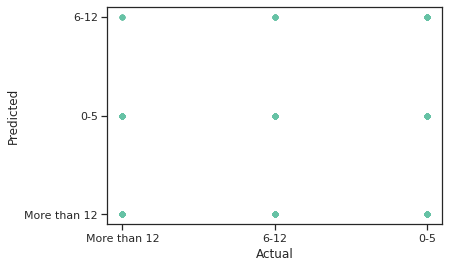

In [76]:
regressor = LogisticRegression(max_iter=5000)  
regressor.fit(X_train, Y_train)

Y_pred = regressor.predict(X_test)

print ("Accuracy on testing = %.4f" % accuracy_score(regressor.predict(X_test), Y_test) )

df_new = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
df_new.plot(kind="scatter", x='Actual', y='Predicted')

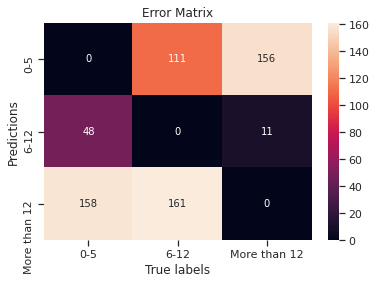

In [77]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
%matplotlib inline
import matplotlib.pylab as plt

tick_labels = ['0-5','6-12','More than 12']

def plot_matrix(mat, title, remove_diagonal=True):
    error_mat = mat.copy()
    if remove_diagonal:
        diag_ixs = np.arange(mat.shape[0])
        error_mat[diag_ixs, diag_ixs] = 0
    sns.heatmap(error_mat, annot=True, fmt='d', yticklabels=tick_labels, xticklabels=tick_labels)
    plt.ylabel('Predictions')
    plt.xlabel('True labels')
    plt.title(title)

random_predictions = np.random.choice(range(len(Y_test)), len(Y))
random_conf_mat = confusion_matrix(regressor.predict(X_test), Y_test)
plot_matrix(random_conf_mat, 'Error Matrix', remove_diagonal=True)

**2. Decision Tree Classifier:**

It is in form of trees that are incrementally updated by splitting the dataset into smaller datasets and we can without a need to re-train results in the leaf nodes. 

I used this because it needs low level of data preparation (normalization or scaling) and it is able to distinguish classes without large errors (less misclassification).

In [78]:
from sklearn import tree
from sklearn.metrics import accuracy_score
for i in range(1,30):
  clf = tree.DecisionTreeClassifier(criterion="entropy",max_depth=i)
  clf = clf.fit(X_train, Y_train)
  print("When i is " + str(i))
  print ("Accuracy on testing = %.4f" % accuracy_score(clf.predict(X_test), Y_test)) 

When i is 1
Accuracy on testing = 0.6638
When i is 2
Accuracy on testing = 0.7334
When i is 3
Accuracy on testing = 0.7449
When i is 4
Accuracy on testing = 0.7757
When i is 5
Accuracy on testing = 0.7814
When i is 6
Accuracy on testing = 0.7917
When i is 7
Accuracy on testing = 0.7945
When i is 8
Accuracy on testing = 0.8048
When i is 9
Accuracy on testing = 0.8037
When i is 10
Accuracy on testing = 0.7968
When i is 11
Accuracy on testing = 0.7934
When i is 12
Accuracy on testing = 0.7837
When i is 13
Accuracy on testing = 0.7797
When i is 14
Accuracy on testing = 0.7803
When i is 15
Accuracy on testing = 0.7700
When i is 16
Accuracy on testing = 0.7774
When i is 17
Accuracy on testing = 0.7671
When i is 18
Accuracy on testing = 0.7666
When i is 19
Accuracy on testing = 0.7648
When i is 20
Accuracy on testing = 0.7648
When i is 21
Accuracy on testing = 0.7620
When i is 22
Accuracy on testing = 0.7637
When i is 23
Accuracy on testing = 0.7586
When i is 24
Accuracy on testing = 0.7614
W

In [85]:
clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=9)
clf = clf.fit(X_train, Y_train)
print ("Accuracy on testing = %.4f" % accuracy_score(clf.predict(X_test), Y_test)) 

Accuracy on testing = 0.8025


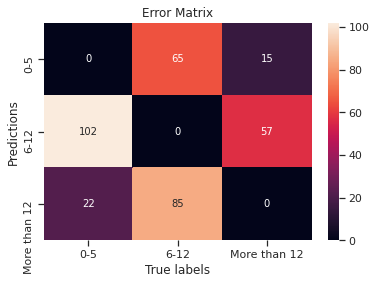

In [86]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
%matplotlib inline
import matplotlib.pylab as plt

tick_labels = ['0-5','6-12','More than 12']

def plot_matrix(mat, title, remove_diagonal=True):
    error_mat = mat.copy()
    if remove_diagonal:
        diag_ixs = np.arange(mat.shape[0])
        error_mat[diag_ixs, diag_ixs] = 0
    sns.heatmap(error_mat, annot=True, fmt='d', yticklabels=tick_labels, xticklabels=tick_labels)
    plt.ylabel('Predictions')
    plt.xlabel('True labels')
    plt.title(title)

random_predictions = np.random.choice(range(len(Y_test)), len(Y))
random_conf_mat = confusion_matrix(clf.predict(X_test), Y_test)
plot_matrix(random_conf_mat, 'Error Matrix', remove_diagonal=True)

**3. KNN:**

It stores all available classes and classifies an instance based on a similarity/distance measure. (Manhattan/Euclidean).

I used this because here the data could be added at will without a need to re-train the model since It performs the on spot and instance-based learning.

In [87]:
from sklearn.neighbors import KNeighborsClassifier
for i in range(1,20):
  Knnmodel = KNeighborsClassifier(n_neighbors=i)
  Knnmodel.fit(X_train,Y_train)
  print("When i is " + str(i))
  print ("Accuracy on testing = %.4f" % accuracy_score(Knnmodel.predict(X_test), Y_test) )

When i is 1
Accuracy on testing = 0.7540
When i is 2
Accuracy on testing = 0.7483
When i is 3
Accuracy on testing = 0.7985
When i is 4
Accuracy on testing = 0.7911
When i is 5
Accuracy on testing = 0.7985
When i is 6
Accuracy on testing = 0.7905
When i is 7
Accuracy on testing = 0.7820
When i is 8
Accuracy on testing = 0.7831
When i is 9
Accuracy on testing = 0.7774
When i is 10
Accuracy on testing = 0.7723
When i is 11
Accuracy on testing = 0.7723
When i is 12
Accuracy on testing = 0.7711
When i is 13
Accuracy on testing = 0.7671
When i is 14
Accuracy on testing = 0.7694
When i is 15
Accuracy on testing = 0.7757
When i is 16
Accuracy on testing = 0.7677
When i is 17
Accuracy on testing = 0.7683
When i is 18
Accuracy on testing = 0.7643
When i is 19
Accuracy on testing = 0.7643


In [88]:
from sklearn.neighbors import KNeighborsClassifier
Knnmodel = KNeighborsClassifier(n_neighbors=3)
Knnmodel.fit(X_train,Y_train)
print ("Accuracy on testing = %.4f" % accuracy_score(Knnmodel.predict(X_test), Y_test) )

Accuracy on testing = 0.7985


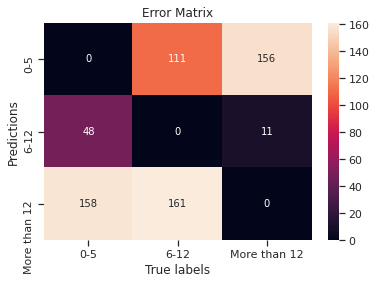

In [89]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
%matplotlib inline
import matplotlib.pylab as plt

tick_labels = ['0-5','6-12','More than 12']

def plot_matrix(mat, title, remove_diagonal=True):
    error_mat = mat.copy()
    if remove_diagonal:
        diag_ixs = np.arange(mat.shape[0])
        error_mat[diag_ixs, diag_ixs] = 0
    sns.heatmap(error_mat, annot=True, fmt='d', yticklabels=tick_labels, xticklabels=tick_labels)
    plt.ylabel('Predictions')
    plt.xlabel('True labels')
    plt.title(title)

random_predictions = np.random.choice(range(len(Y_test)), len(Y))
random_conf_mat = confusion_matrix(regressor.predict(X_test), Y_test)
plot_matrix(random_conf_mat, 'Error Matrix', remove_diagonal=True)